In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:

# Load cleaned data
df = pd.read_csv('../data/cleaned/zomato_cleaned.csv')

In [3]:
# Preview
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,avg_cost_for_two,reviews_list,service_type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [4]:
# Copy relevant columns
features = df[['rate', 'votes', 'avg_cost_for_two', 'online_order', 'book_table']].copy()


In [5]:
# Map Yes/No to 1/0
features['online_order'] = features['online_order'].map({'Yes': 1, 'No': 0})
features['book_table'] = features['book_table'].map({'Yes': 1, 'No': 0})

features.head()

,rate,votes,avg_cost_for_two,online_order,book_table
0,4.1,775,800.0,1,1
1,4.1,787,800.0,1,0
2,3.8,918,800.0,1,0
3,3.7,88,300.0,0,0
4,3.8,166,600.0,0,0


In [6]:
from sklearn.preprocessing import StandardScaler


In [7]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
# Convert to DataFrame for reference
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df.head()

,rate,votes,avg_cost_for_two,online_order,book_table
0,1.010547,0.610949,0.561071,0.835505,2.648797
1,1.010547,0.625875,0.561071,0.835505,-0.377530
2,0.251951,0.788816,0.561071,0.835505,-0.377530
3,-0.000915,-0.243556,-0.581428,-1.196881,-0.377530
4,0.251951,-0.146538,0.104072,-1.196881,-0.377530


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [10]:
wcss = []


In [11]:

# Test cluster numbers from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

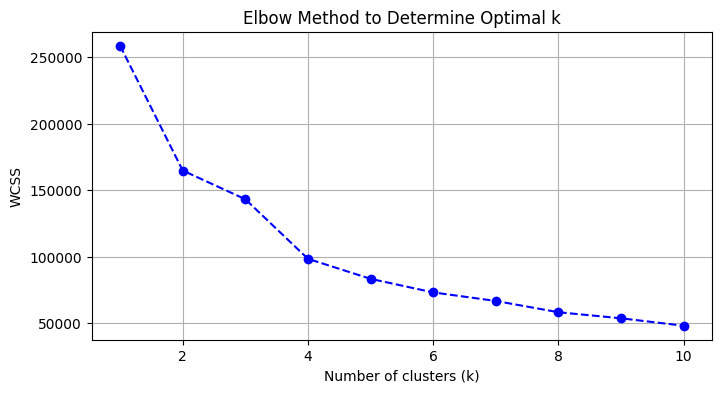

In [12]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [13]:
# Apply KMeans with optimal k (say 4 for now)
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_df)

In [14]:

# View sample output
df[['name', 'rate', 'votes', 'avg_cost_for_two', 'cluster']].head()

,name,rate,votes,avg_cost_for_two,cluster
0,Jalsa,4.1,775,800.0,2
1,Spice Elephant,4.1,787,800.0,1
2,San Churro Cafe,3.8,918,800.0,1
3,Addhuri Udupi Bhojana,3.7,88,300.0,3
4,Grand Village,3.8,166,600.0,3


In [15]:
# Cluster profile using mean
cluster_profile = df.groupby('cluster')[['rate', 'votes', 'avg_cost_for_two']].mean().round(2)
cluster_profile['count'] = df['cluster'].value_counts().sort_index()

cluster_profile


,rate,votes,avg_cost_for_two,count
cluster,,,,
0,4.43,4913.51,1269.54,888
1,3.65,150.92,436.29,26377
2,4.12,796.38,1300.16,6162
3,3.59,77.77,438.78,18269


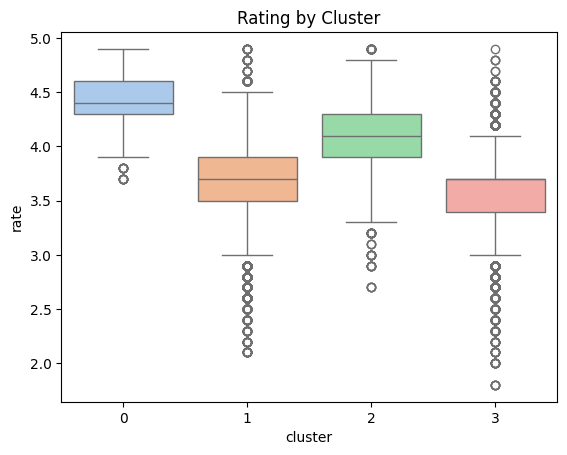

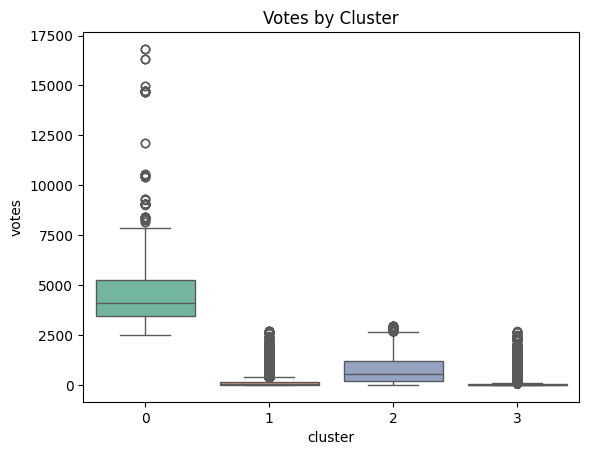

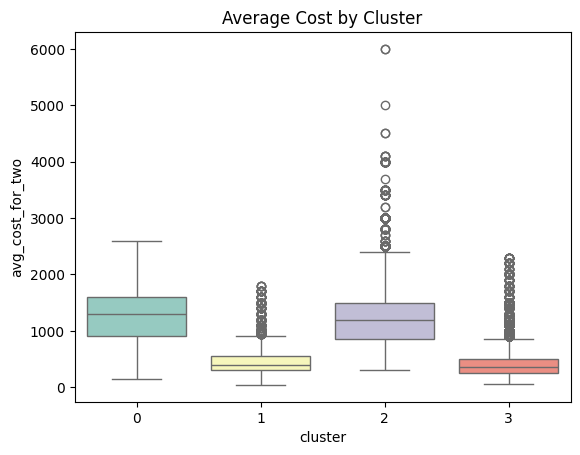

In [26]:
# Rating by Cluster
sns.boxplot(data=df, x='cluster', y='rate', hue='cluster', palette='pastel', legend=False)
plt.title("Rating by Cluster")
plt.show()

# Votes by Cluster
sns.boxplot(data=df, x='cluster', y='votes', hue='cluster', palette='Set2', legend=False)
plt.title("Votes by Cluster")
plt.show()

# Avg Cost by Cluster
sns.boxplot(data=df, x='cluster', y='avg_cost_for_two', hue='cluster', palette='Set3', legend=False)
plt.title("Average Cost by Cluster")
plt.show()


In [27]:
# Save clustered data
df.to_csv('C:/Users/ASUS/Desktop/ML Jupyter/zomato-bengaluru-market-insights/data/cleaned/zomato_clustered.csv', index=False)
